<a href="https://colab.research.google.com/github/lisethrubio/Project4-Machine_Learning_Model/blob/Steven_branch2/Class_Prediction_A_D_Matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the input dataset
body_df = pd.read_csv('/content/bodyPerformance.csv')

In [6]:
# Restructure class column into 0 and 1
body_df['class'] = body_df['class'].replace({'A':0, 'B':0, 'C':1 , 'D':1})

In [7]:
# Encode (convert to dummy variables) the "gender" column
gender_encoded = pd.get_dummies(body_df['gender'], prefix="gender", dtype=int)

In [8]:
# Concatenate the scaled data DataFrame with the "IMF Country Code" encoded dummies
new_body_df = pd.concat([body_df, gender_encoded], axis=1)

In [9]:
# Encode the target variable 'class'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(new_body_df["class"].values)

# Remove 'class' and 'gender' columns from the features data
X = new_body_df.drop(columns=["class", "gender"]).values

In [10]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [11]:
# Preprocess numerical data for the neural network
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [13]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
cm_df = pd.DataFrame(
    cm, index=["Actual A", "Actual D"], columns=["Predicted A", "Predicted D"]
)

In [15]:
print(cm_df)

          Predicted A  Predicted D
Actual A         1388          286
Actual D          289         1386


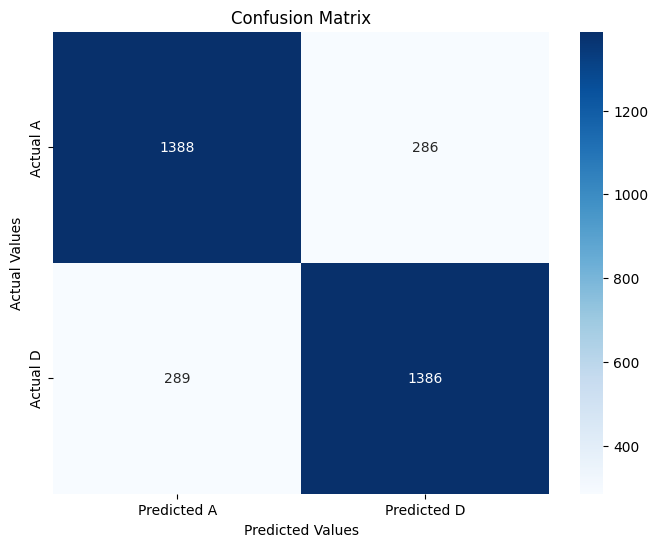

In [16]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [17]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(f"Accuracy Score: {acc_score}")

# Optional: Classification report
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=["A", "D"]))


Accuracy Score: 0.8283069573006868
Classification Report:
               precision    recall  f1-score   support

           A       0.83      0.83      0.83      1674
           D       0.83      0.83      0.83      1675

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



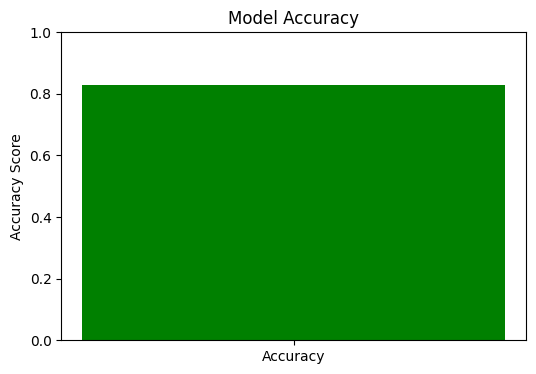

In [18]:
# Plotting the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [acc_score], color='green')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()